# Linear models - Regularization

In this notebook, we will focus on the concept of regularization in linear models.

## Introductionary example

In this first example, we will show a known issue due to correlated features when fitting a linear model.

The data generative process to create the data is a linear relationship between the features and the target. However, out of 5 features, only 2 features will be used while 3 other features will not be linked to the target. In addition, a little bit of noise will be added. When generating the dataset, we can as well get the true model.

In [1]:
from sklearn.datasets import make_regression

data, target, coef = make_regression(
    n_samples=2_000,
    n_features=5,
    n_informative=2,
    shuffle=False,
    coef=True,
    random_state=0,
    noise=30,
)

In [2]:
import seaborn as sns
sns.set_context("poster")

Features 0     9.566665
Features 1    40.192077
Features 2     0.000000
Features 3     0.000000
Features 4     0.000000
dtype: float64

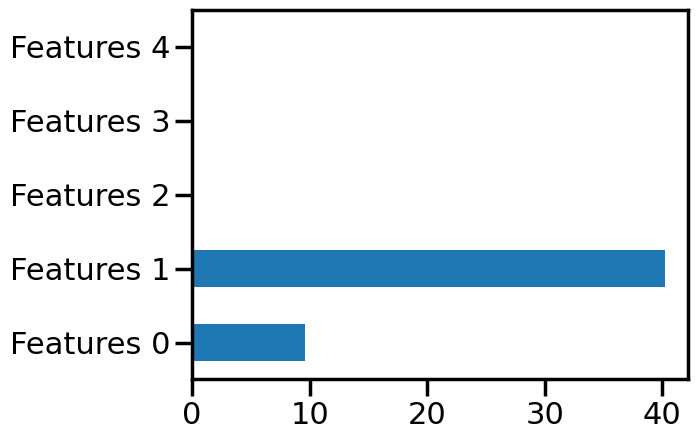

In [3]:
import pandas as pd

feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(coef, index=feature_names)
coef.plot.barh()
coef

Plotting the true coefficients, we observe that only 2 features out of the 5 features as an impact on the target.

Now, we will fit a linear model on this dataset.

In [4]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data, target)
linear_regression.coef_

array([10.89587004, 40.41128042, -0.20542454, -0.18954462,  0.11129768])

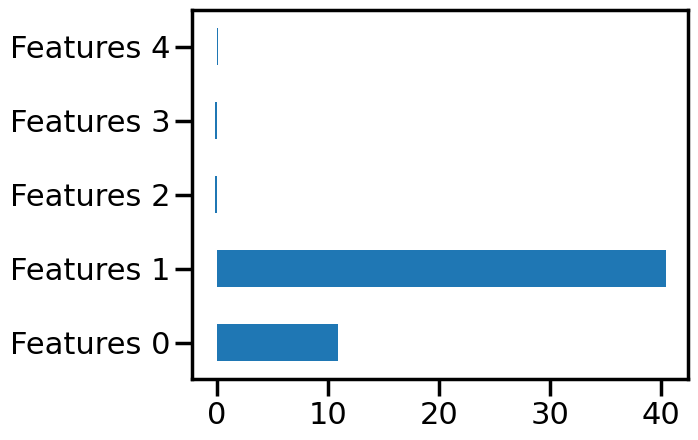

In [5]:
feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(linear_regression.coef_, index=feature_names)
_ = coef.plot.barh()

We observe that we can recover almost the true coefficients. The small fluctuation are due to the noise that we added into the dataset when generating it.

<div class="alert alert-success">
    <p><b>EXERCISE</b>:</p>
    Now, we will create some correlated feature and observe what is the impact.
    <ul>
        <li>Using <tt>X</tt>, add 4 new features that will be a repetition of features #0 and #1.</li>
        <li>Fit a <tt>LinearRegression</tt> model.</li>
        <li>Plot the value of the coefficients.</li>
    </ul>
    Are the coefficient values meaningful in regarde to the true coefficients used to generate the dataset?
</div>

In [ ]:
# my solution

# Using data, add 4 new features that will be a repetition of features #0 and #1.

import numpy as np

data = np.hstack((data, data[:,0].reshape(-1,1),  data[:,0].reshape(-1,1), data[:,1].reshape(-1,1),  data[:,1].reshape(-1,1)))
data.shape

(2000, 9)

In [ ]:
# my solution

# Fit a LinearRegression model.

model = LinearRegression()
model.fit(data, target)

LinearRegression()

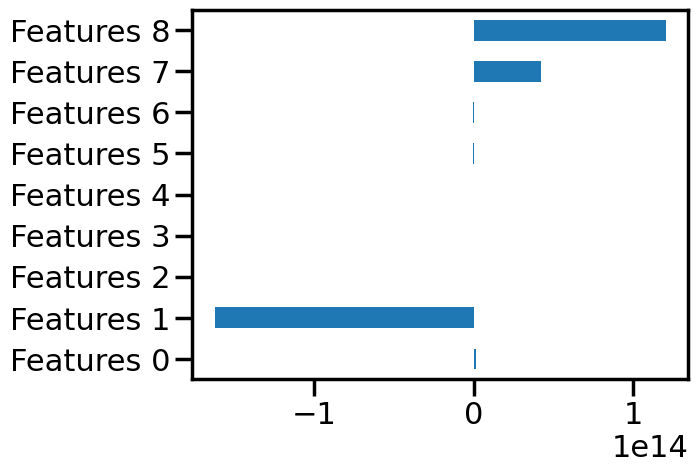

In [11]:
# my solution

# Plot the value of the coefficients.

feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(model.coef_, index=feature_names)
_ = coef.plot.barh()

In [ ]:
# my solution

# Are the coefficient values meaningful in regard to the true coefficients used to generate the dataset?

# No, the values are split up between the informative features: 
# 
# f_1, f_7 and f_8 should measure the same, but they have distributed such that some values are positive and
# some are negative

# f_0, f_6 and f_8 should measure the same, but because of the large scale of the other informative features,
# their impact is not visible anymore

## Ridge regressor - L2 regularization

We saw that our linear model does not succeed to recover the true coefficients. This is due to the fact that the coefficients are not constraints and that the problem is ill-posed due to the multicollinearity. We can solve this issue by imposing some constraints on the weights of the model: this is call regularization. One possible solution is to imposed an L2 regularization on the weights. The loss to be minimized becomes:

$$
loss = (y - X \beta)^2 + \alpha \|\beta\|_2
$$

This regularization will enforce the weights to shrink towards zero. The parameter controlling the shrinking is the parameter $\alpha$.
Such a regression model is known as `Ridge` in scikit-learn. Let's fit such model and check the effect on the weights.

In [12]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(data, target)
ridge.coef_

array([ 3.6313933 , 13.46802113, -0.20549345, -0.18929961,  0.11117205,
        3.6313933 ,  3.6313933 , 13.46802113, 13.46802113])

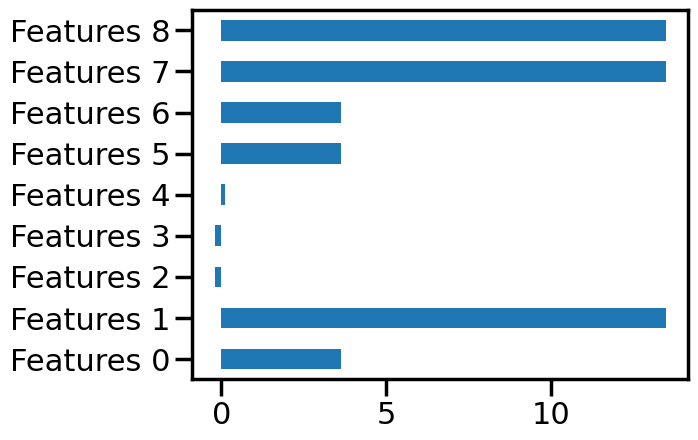

In [13]:
coef = pd.Series(ridge.coef_, index=feature_names)
_ = coef.plot.barh()

Applying a small regularization solves the problem of the weight. We can even find the original relationship:

In [14]:
ridge.coef_[:5] * 3

array([10.89417991, 40.40406338, -0.61648035, -0.56789883,  0.33351616])

By looking at the loss, we see that increasing $\alpha$ will shrink more the weights.

In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1e5)
ridge.fit(data, target)
ridge.coef_

array([ 0.21820102,  0.71529605, -0.02058497,  0.01098567, -0.00493321,
        0.21820102,  0.21820102,  0.71529605,  0.71529605])

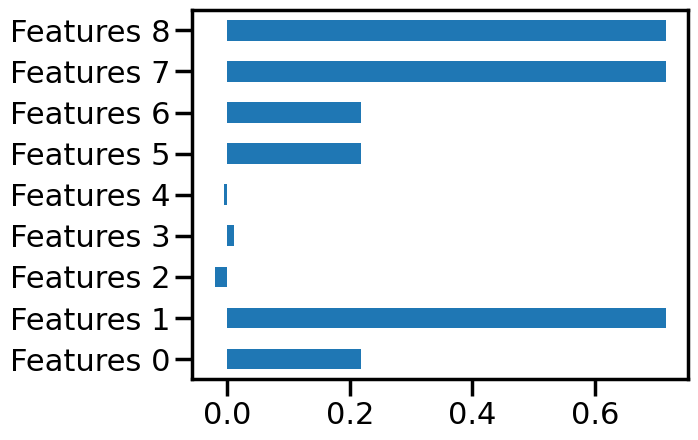

In [16]:
coef = pd.Series(ridge.coef_, index=feature_names)
_ = coef.plot.barh()

We see that the weights shrinked toward zeros but the relative weights of each feature remained the same. We can now verify that passing a very small $\alpha$ will be equivalent to using a `LinearRegression`.

In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1e-14)
ridge.fit(data, target)
ridge.coef_

array([29.78241054,  8.23831472, -0.20542454, -0.18954462,  0.11129768,
       -9.44327025, -9.44327025, 14.89139025, 17.28157545])

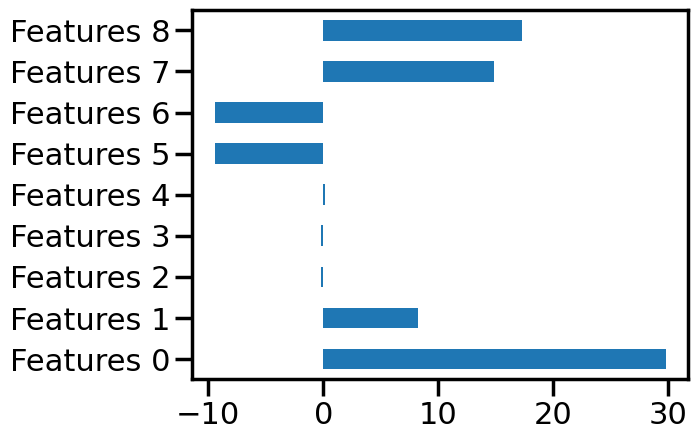

In [25]:
coef = pd.Series(ridge.coef_, index=feature_names)
_ = coef.plot.barh()

## Lasso regressor - L1 regularization

Another possible type of regularization is L1. It can be formalized with:

$$
loss = (y - X \beta)^2 + \alpha \|\beta\|_1
$$

This type of regressor in called `Lasso` in scikit-learn.

<div class="alert alert-success">
    <p><b>EXERCISE</b>:</p>
    Repeat the previous experiment varying the value of $\alpha$ and check what is the impact of $\alpha$ on the weights $\beta$.
</div>

In [ ]:
# my solution

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(data, target)
lasso.coef_

# Lasso eliminates uninformative features entirely; it even discovered the collinearity between the first two
# and the last four features.

array([ 9.91098848, 39.3553463 , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

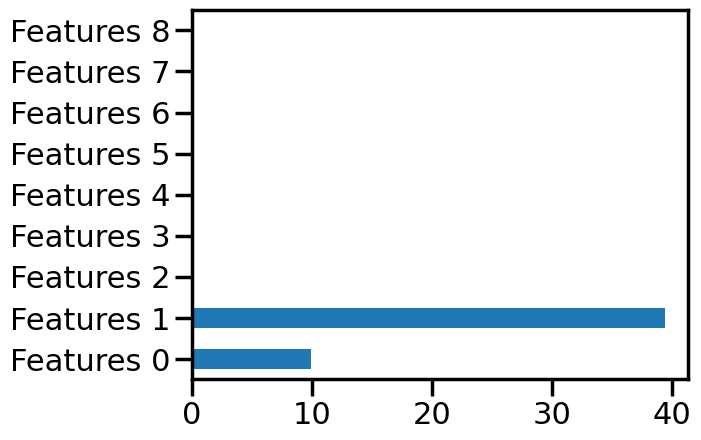

In [27]:
# my solution

coef = pd.Series(lasso.coef_, index=feature_names)
_ = coef.plot.barh()

In [28]:
# my solution

lasso = Lasso(alpha=1e5)
lasso.fit(data, target)
lasso.coef_

array([ 0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.])

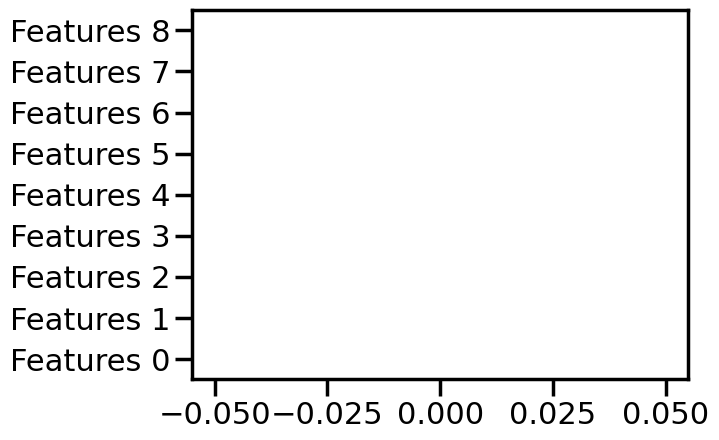

In [29]:
# my solution

coef = pd.Series(lasso.coef_, index=feature_names)
_ = coef.plot.barh()

# that was too much

In [32]:
# my solution
lasso = Lasso(alpha=1e-14)
lasso.fit(data, target)
lasso.coef_

# this is still pretty well!

array([ 1.15290533e+01,  4.04024354e+01, -2.05424545e-01, -1.89544618e-01,
        1.11297684e-01, -6.33183213e-01, -2.02106831e-16,  8.84501168e-03,
        0.00000000e+00])

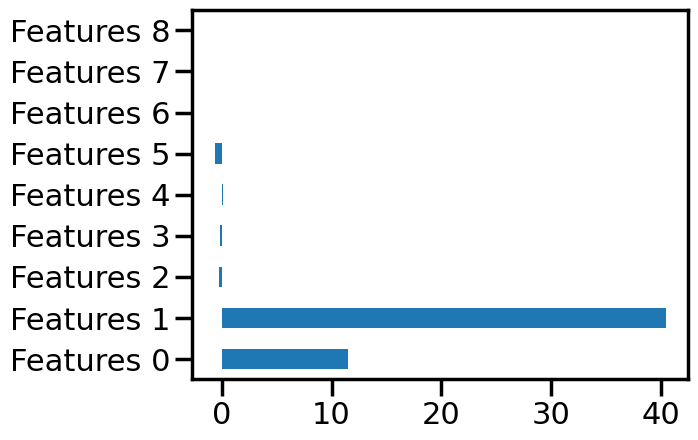

In [33]:
# my solution

coef = pd.Series(lasso.coef_, index=feature_names)
_ = coef.plot.barh()

## Elastic net - Combining both L2 and L1 regularization

Sometimes we can be interested by combining both L2 and L1 regularization: find a subset of features that should contribute to the target prediction but, at the same time, avoid that the non-null coefficients to be arbritary large without any constraint.

In [34]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(data, target)
elastic_net.coef_

array([ 3.00151979, 11.28208142, -0.        , -0.        ,  0.        ,
        3.00100909,  3.00149017, 11.28095205, 11.28200275])

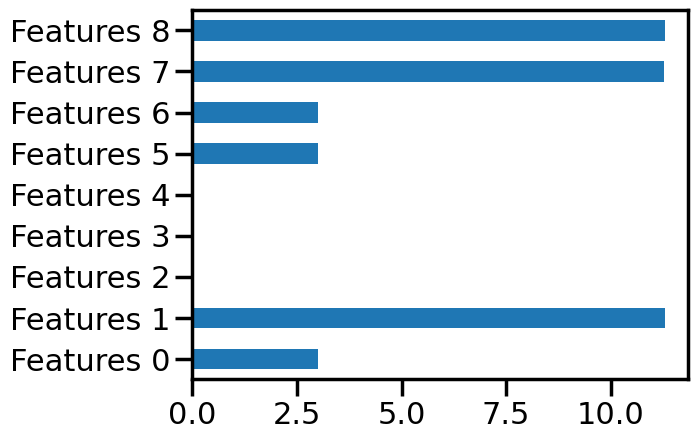

In [35]:
coef = pd.Series(elastic_net.coef_, index=feature_names)
_ = coef.plot.barh()

## What about classification?

In classification, the different choices of regularization do not give rise to different estimator. Instead, the regularization can be set as a parameter of the linear model itself. In classification, there is mainly two models: `LogisticRegression` and `LinearSVC`. They vary in the fact that they minimized different losses. However, they both have a parameter `penalty` and a parameter `C` (that is the inverse of `alpha` in regression).

In this section, we will use a `LogisticRegression` and we will check the impact of the parameter `C`. Let's first load a classification dataset. Here, we want to predict the penguin species from two features that are the culmen length and depth.

In [36]:
data = pd.read_csv("../datasets/penguins_classification.csv")
data = data[data["Species"].isin(["Adelie", "Chinstrap"])]
data["Species"] = data["Species"].astype("category")
data.head()

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie


In [37]:
X, y = data[["Culmen Length (mm)", "Culmen Depth (mm)"]], data["Species"]

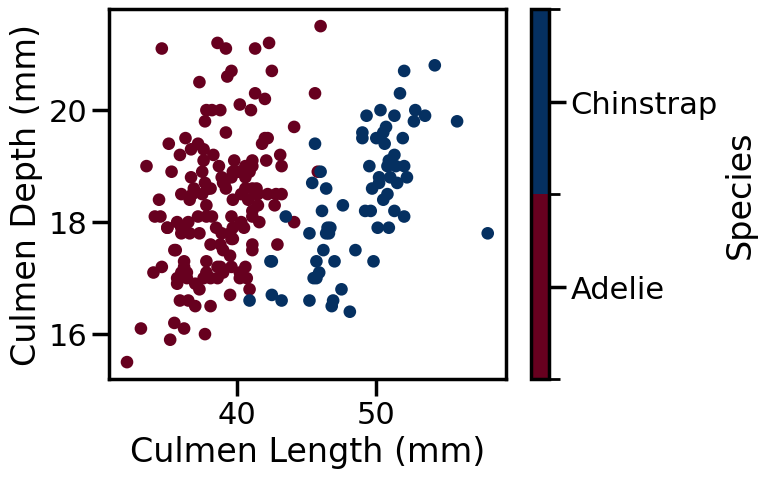

In [38]:
import matplotlib.pyplot as plt

_ = data.plot.scatter(
    x="Culmen Length (mm)", y="Culmen Depth (mm)", c="Species",
    cmap="RdBu", s=50,
)

<div class="alert alert-success">
    <p><b>QUESTION</b>:</p>
    Looking at the documentation, what is the default regularization (or no regularization) by default in <tt>LogisticRegression</tt>?
</div>

In [ ]:
# my solution

# default is the squared penalty, l2 norm, or ridge

Below, we fit a `LogisticRegression` model with the default parameters.

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

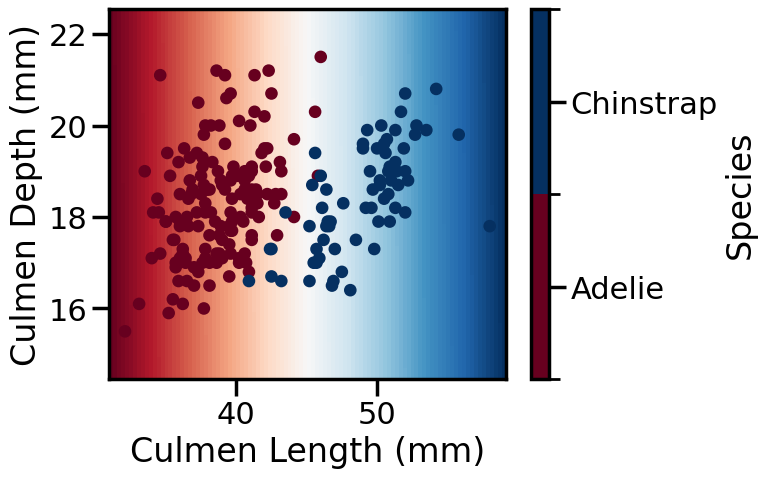

In [46]:
from sklearn.inspection import DecisionBoundaryDisplay

display = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="decision_function",
    cmap=plt.cm.RdBu,
    plot_method="pcolormesh",
    shading="auto",
)
_ = data.plot.scatter(
    x="Culmen Length (mm)", y="Culmen Depth (mm)", c="Species",
    cmap="RdBu", s=50, ax=display.ax_
)

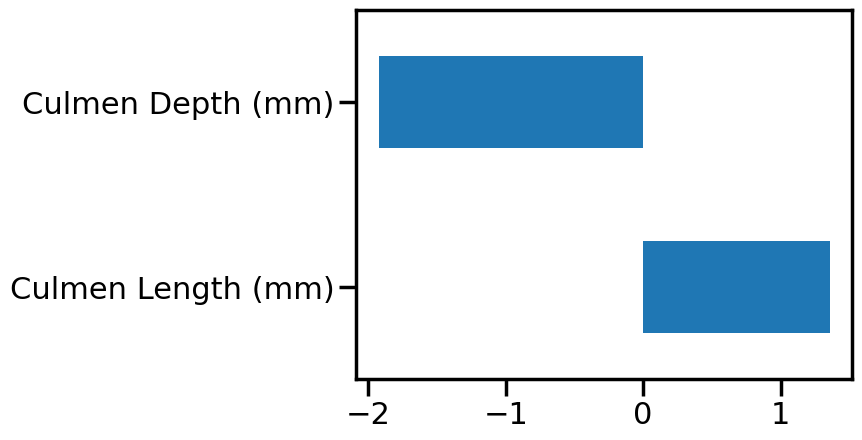

In [42]:
coef = pd.Series(model.coef_[0], index=X.columns)
_ = coef.plot.barh()

We can use this example as a baseline to observe the effect of the parameter `C`. In addition, we can provide that the loss function of a logistic regression is the following:

$$
loss = \frac{1 - \rho}{2} w^T w + \rho \|w\|_1 + C \log ( \exp (y_i (X \beta)) + 1)
$$

Looking at the loss above, we see that the parameter `C` is applied on the data term (computing the error between the true and predicted target). In regression, this regularization weight $\alpha$ was applied on the weights instead. For this reason, `C` have the inverse impact than $\alpha$

<div class="alert alert-success">
    <p><b>EXERCISE</b>:</p>
    Repeat a fit and check the impact of the paramter <tt>C</tt> on both the coefficients and the decision boundary of the classifier.
</div>

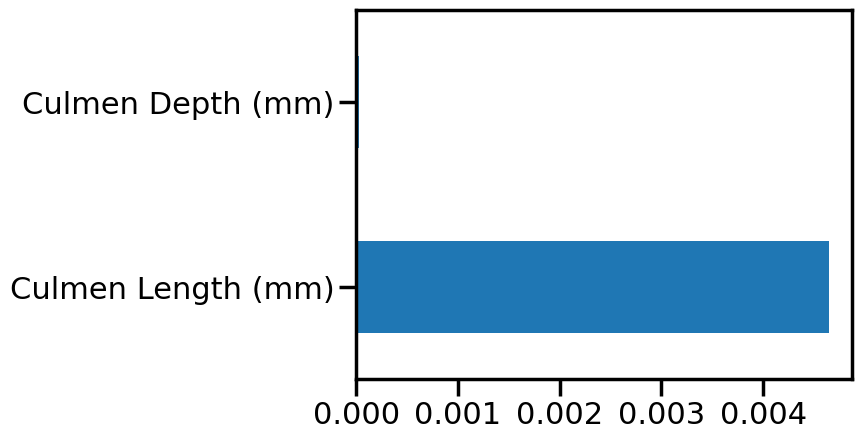

In [ ]:
# my solution

model = LogisticRegression(C=1e-5)
model.fit(X, y)

coef = pd.Series(model.coef_[0], index=X.columns)
_ = coef.plot.barh()

# it's true: the culmen length is the more important feature

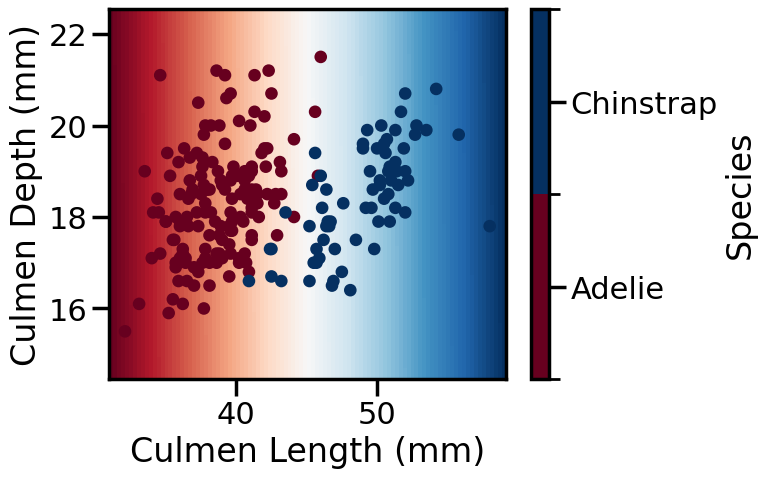

In [47]:
# my solution

display = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="decision_function",
    cmap=plt.cm.RdBu,
    plot_method="pcolormesh",
    shading="auto",
)
_ = data.plot.scatter(
    x="Culmen Length (mm)", y="Culmen Depth (mm)", c="Species",
    cmap="RdBu", s=50, ax=display.ax_
)

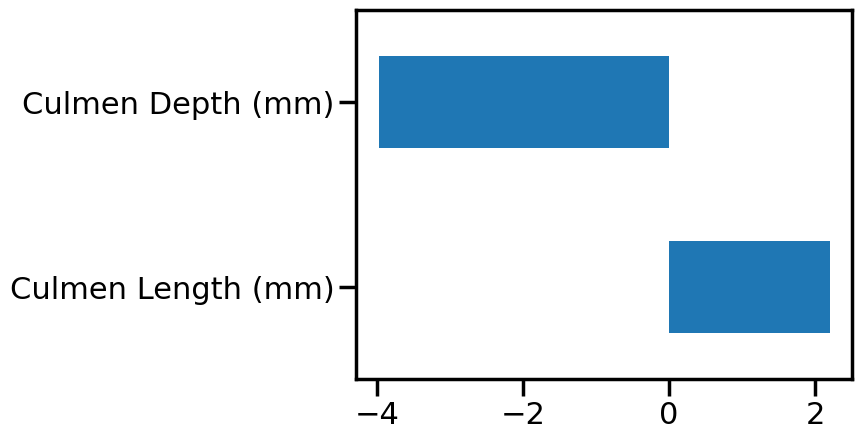

In [48]:
# my solution

model = LogisticRegression(C=1e5)
model.fit(X, y)

coef = pd.Series(model.coef_[0], index=X.columns)
_ = coef.plot.barh()

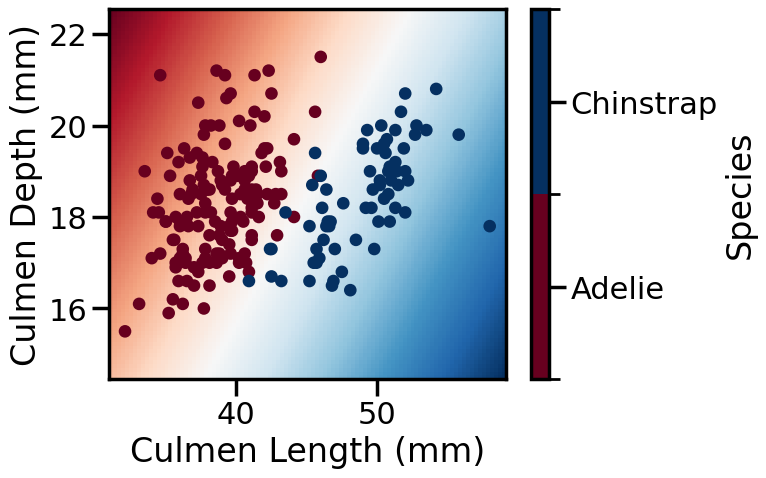

In [49]:
# my solution

display = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="decision_function",
    cmap=plt.cm.RdBu,
    plot_method="pcolormesh",
    shading="auto",
)
_ = data.plot.scatter(
    x="Culmen Length (mm)", y="Culmen Depth (mm)", c="Species",
    cmap="RdBu", s=50, ax=display.ax_
)